In [79]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, re
from tensorflow.keras import layers, models, regularizers
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn import metrics, preprocessing
from keras.utils.np_utils import to_categorical
from sklearn.utils import shuffle

In [80]:
train_df = pd.read_csv('combined_phase.csv', sep='\t')
test_df = pd.read_csv('combined_test_phase.csv', sep='\t')

In [81]:
X_test = test_df[["0", "1", "2", "3","4", "5", "6", "7"]]
y_test = test_df['codes']

In [82]:
np.shape(train_df[["peak_1", "peak_2", "peak_3", "peak_4","peak_5", "peak_6", "peak_7", "peak_8"]])

(30000, 8)

In [83]:
np.shape(X_test)

(7, 8)

In [104]:
X_test_re = X_test.values.reshape(7,8,1)
mesured_test_labels = to_categorical(y_test)

In [86]:
training_data = shuffle(train_df)

X = training_data[["peak_1", "peak_2", "peak_3", "peak_4","peak_5", "peak_6", "peak_7", "peak_8"]]
y = training_data["codes"]

In [87]:
X_re = X.values.reshape(30000,8,1)

In [88]:
train_features, test_features, train_labels, test_labels = train_test_split(X_re, 
                                                        codes_train, 
                                                        test_size=0.25, 
                                                        random_state=42)

In [95]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
    
X_val = train_features[:1000]
partial_X_train = train_features[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [101]:
model = models.Sequential()
model.add(layers.Conv1D(filters=20, kernel_size=5, strides=1, padding="same", activation="relu", input_shape=(8,1)))
model.add(layers.MaxPooling1D(1))
model.add(layers.Conv1D(filters=20, kernel_size=5, strides=1, padding="same", activation="relu"))
model.add(layers.MaxPooling1D(1))
model.add(layers.Flatten())
model.add(layers.Dense(3, activation='sigmoid'))

In [102]:
train_features, test_features, train_labels, test_labels = train_test_split(X_re, 
                                                        y, 
                                                        test_size=0.25, 
                                                        random_state=42)

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

X_val = train_features[:1000]
partial_X_train = train_features[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(partial_X_train, partial_y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val))    

Train on 21500 samples, validate on 1000 samples
Epoch 1/100
21500/21500 [==============================] - 4s 171us/sample - loss: 0.6423 - accuracy: 0.6610 - val_loss: 0.6295 - val_accuracy: 0.6667
Epoch 2/100
21500/21500 [==============================] - 3s 157us/sample - loss: 0.6087 - accuracy: 0.6760 - val_loss: 0.5413 - val_accuracy: 0.6760
Epoch 3/100
21500/21500 [==============================] - 3s 148us/sample - loss: 0.3975 - accuracy: 0.8257 - val_loss: 0.2791 - val_accuracy: 0.8783
Epoch 4/100
21500/21500 [==============================] - 3s 150us/sample - loss: 0.2435 - accuracy: 0.8917 - val_loss: 0.1720 - val_accuracy: 0.9553
Epoch 5/100
21500/21500 [==============================] - 3s 151us/sample - loss: 0.1507 - accuracy: 0.9507 - val_loss: 0.1236 - val_accuracy: 0.9563
Epoch 6/100
21500/21500 [==============================] - 3s 149us/sample - loss: 0.1255 - accuracy: 0.9538 - val_loss: 0.0745 - val_accuracy: 0.9763
Epoch 7/100
21500/21500 [====================

21500/21500 [==============================] - 3s 138us/sample - loss: 0.0649 - accuracy: 0.9730 - val_loss: 0.0811 - val_accuracy: 0.9657
Epoch 55/100
21500/21500 [==============================] - 3s 134us/sample - loss: 0.0616 - accuracy: 0.9746 - val_loss: 0.0558 - val_accuracy: 0.9773
Epoch 56/100
21500/21500 [==============================] - 3s 133us/sample - loss: 0.0675 - accuracy: 0.9723 - val_loss: 0.1070 - val_accuracy: 0.9597
Epoch 57/100
21500/21500 [==============================] - 3s 130us/sample - loss: 0.0666 - accuracy: 0.9723 - val_loss: 0.0485 - val_accuracy: 0.9807
Epoch 58/100
21500/21500 [==============================] - 3s 134us/sample - loss: 0.0634 - accuracy: 0.9739 - val_loss: 0.0489 - val_accuracy: 0.9813
Epoch 59/100
21500/21500 [==============================] - 3s 135us/sample - loss: 0.0634 - accuracy: 0.9744 - val_loss: 0.0516 - val_accuracy: 0.9780
Epoch 60/100
21500/21500 [==============================] - 4s 169us/sample - loss: 0.0624 - accuracy

In [105]:
model.evaluate(X_test_re, mesured_test_labels)

7/7 [==============================] - 0s 673us/sample - loss: 0.0069 - accuracy: 1.0000


[0.0069022527895867825, 1.0]

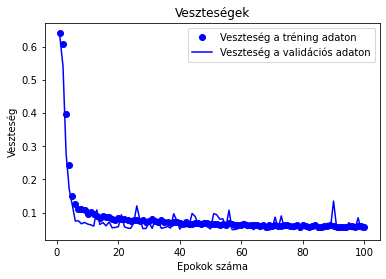

In [108]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Veszteség a tréning adaton')
plt.plot(epochs, val_loss, 'b', label='Veszteség a validációs adaton')
plt.title('Veszteségek')
plt.xlabel('Epokok száma')
plt.ylabel('Veszteség')
plt.legend()
plt.savefig("loss_multiphase_cubic")
plt.show()

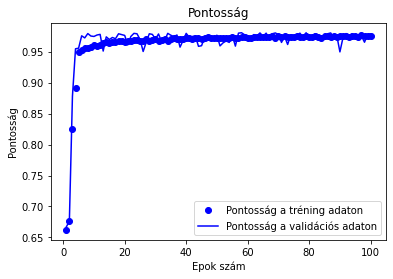

In [107]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'bo', label='Pontosság a tréning adaton')
plt.plot(epochs, val_acc, 'b', label='Pontosság a validációs adaton')
plt.title('Pontosság')
plt.xlabel('Epokok szám')
plt.ylabel('Pontosság')
plt.legend()
plt.savefig("acc_multiphase_cubic")
plt.show()

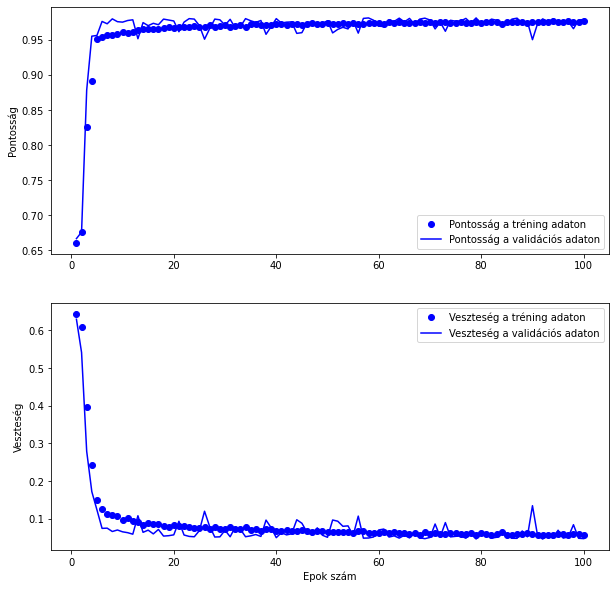

In [110]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(10,10))
ax1.plot(epochs, acc, 'bo', label='Pontosság a tréning adaton')
ax1.plot(epochs, val_acc, 'b', label='Pontosság a validációs adaton')
ax1.set_ylabel('Pontosság')
ax1.legend()
ax2.plot(epochs, loss, 'bo', label='Veszteség a tréning adaton')
ax2.plot(epochs, val_loss, 'b', label='Veszteség a validációs adaton')
ax2.set_xlabel('Epok szám')
ax2.set_ylabel('Veszteség')
ax2.legend()
plt.savefig('phase_multiple')